In [1]:
#mnist
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels)=mnist.load_data()

Using TensorFlow backend.


In [2]:
train_images.shape

(60000, 28, 28)

In [3]:
len(train_labels)

60000

In [4]:
# 신경망 구조
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax')) #10개의 확률점수가 들어있는 배열, 2번째 Dense

In [5]:
#컴파일
network.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [6]:
#이미지 데이터 준비
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype('float32')/255

In [7]:
#레이블 준비
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [8]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 5s 91us/step - loss: 0.2538 - accuracy: 0.9265
Epoch 2/5
60000/60000 [==============================] - 6s 108us/step - loss: 0.1039 - accuracy: 0.9691
Epoch 3/5
60000/60000 [==============================] - 7s 112us/step - loss: 0.0685 - accuracy: 0.9796
Epoch 4/5
60000/60000 [==============================] - ETA: 0s - loss: 0.0493 - accuracy: 0.9856 ETA: 1s - loss: 0.0484 - ac - 8s 131us/step - loss: 0.0494 - accuracy: 0.9856
Epoch 5/5
60000/60000 [==============================] - 7s 116us/step - loss: 0.0369 - accuracy: 0.9889


In [9]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 47us/step


In [10]:
print('test_acc:',test_acc)

test_acc: 0.9811000227928162


In [1]:
#영화
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels)=imdb.load_data(num_words=10000)

Using TensorFlow backend.
C:\Users\User\anaconda3\envs\ai\lib\site-packages\keras\datasets\imdb.py:101: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\User\anaconda3\envs\ai\lib\site-packages\keras\datasets\imdb.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


train_labels와 test_labels는 부정을 나타내는 0과 긍정을 나타내는 1의 리스트이다

In [2]:
train_labels[0:]

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [3]:
max([max(sequence) for sequence in train_data])

9999

In [2]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

리스트를 텐서로 바꾸는 방법
* 같은 길이가 되도록 리스트에 패딩(padding)을 추가하고 (samples, sequence_length)크기의 정수텐서로 변환한다. 그 다음 이 정수텐서를 다룰 수 있는 층을 신경망의 첫 번째 층으로 사용한다

* 리스트를 원 핫 인코딩(one-hot encoding)해서 0과 1의 벡터로 변환한다. 예를 들어 시퀀스[3, 5]를 인덱스 3과 5의 위치는 1이고 그 외는 모두 0인 10000차원의 벡터로 각각 변환한 후 부동소수 벡터데이터를 다룰 수 있는 Dense층을 신경망의 첫 번째 층으로 사용한다

In [3]:
#데이터 원 핫 벡터로 만들기(두번째 방식)
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [4]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [5]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [6]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [7]:
#옵티마이저 설정
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

* 손실함수: 훈련데이터에서 신경망의 성능을 측정하는 방식으로 네트워크가 옳은 방향으로 학습될 수 있도록 도와줌
* 옵티마이저: 입력된 데이터와 손실함수를 기반으로 네트워크를 업데이트하는 메커니즘

In [8]:
#손실과 측정을 함수 객체로 지정
from keras import losses
from keras import metrics
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [9]:
#훈련 검증-검증 세트준비
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

전체 훈련 데이터에 수행되는 각 반복을 에포크(epoch)라고 한다

In [10]:
# 모델 훈련
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 141us/step - loss: 0.5462 - acc: 0.7914 - val_loss: 0.4404 - val_acc: 0.8423
Epoch 2/20
15000/15000 [==============================] - 2s 117us/step - loss: 0.3391 - acc: 0.8943 - val_loss: 0.3372 - val_acc: 0.8707
Epoch 3/20
15000/15000 [==============================] - 2s 130us/step - loss: 0.2449 - acc: 0.9239 - val_loss: 0.2889 - val_acc: 0.8871
Epoch 4/20
15000/15000 [==============================] - 2s 123us/step - loss: 0.1917 - acc: 0.9387 - val_loss: 0.2725 - val_acc: 0.8920
Epoch 5/20
15000/15000 [==============================] - 2s 139us/step - loss: 0.1559 - acc: 0.9501 - val_loss: 0.2753 - val_acc: 0.8880
Epoch 6/20
15000/15000 [==============================] - 2s 112us/step - loss: 0.1281 - acc: 0.9592 - val_loss: 0.2852 - val_acc: 0.8864
Epoch 7/20
15000/15000 [==============================] - 2s 124us/step - loss: 0.1066 - acc: 0.9683 - val_loss: 0.3271 - 

In [13]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

<function matplotlib.pyplot.show(close=None, block=None)>

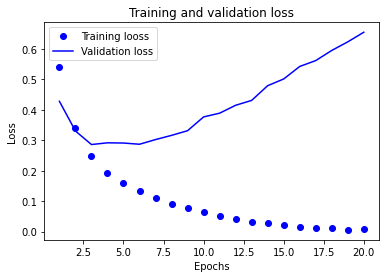

In [14]:
#훈련과 검증손실 그리기
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training looss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

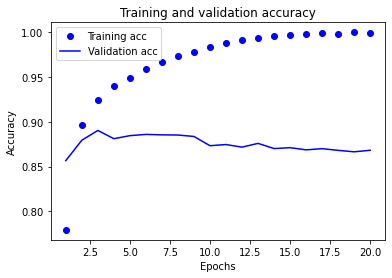

In [15]:
#훈련과 검증 정확도 그리기
plt.clf() # 그래프 초기화하기
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show

훈련 손실은 에포크마다 감소, 훈련 정확도는 에포크마다 증가, 4번째 에포크에서 그래프 역전=>과대적합(훈련 세트 이외의 데이터에는 부적합)

In [16]:
# 모델 처음부터 다시 훈련하기(4번의 에포크 동안)
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 80us/step - loss: 0.4938 - accuracy: 0.8156
Epoch 2/4
25000/25000 [==============================] - 2s 77us/step - loss: 0.2804 - accuracy: 0.9062
Epoch 3/4
25000/25000 [==============================] - 2s 78us/step - loss: 0.2086 - accuracy: 0.9274
Epoch 4/4
25000/25000 [==============================] - 3s 108us/step


In [32]:
results

[0.30811139752388, 0.878600001335144]

In [17]:
model.predict(x_test)

array([[0.132142  ],
       [0.9999827 ],
       [0.9103702 ],
       ...,
       [0.12876593],
       [0.07367615],
       [0.47078443]], dtype=float32)

3.4.6 추가실험

In [17]:
#은닉층 한개 사용
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history=model.fit(x_train, y_train, epochs=4, batch_size=512, validation_data = (x_val, y_val))
results = model.evaluate(x_test, y_test)

ERROR! Session/line number was not unique in database. History logging moved to new session 403
Train on 25000 samples, validate on 10000 samples
Epoch 1/4
25000/25000 [==============================] - 3s 110us/step - loss: 0.4371 - acc: 0.8340 - val_loss: 0.2938 - val_acc: 0.9112
Epoch 2/4
25000/25000 [==============================] - 3s 137us/step - loss: 0.2714 - acc: 0.9071 - val_loss: 0.2188 - val_acc: 0.9319
Epoch 3/4
25000/25000 [==============================] - 3s 102us/step - loss: 0.2160 - acc: 0.9256 - val_loss: 0.1834 - val_acc: 0.9421
Epoch 4/4
25000/25000 [==============================] - 2s 86us/step


In [18]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

<function matplotlib.pyplot.show(close=None, block=None)>

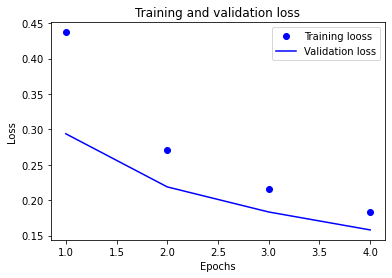

In [19]:
#훈련과 검증손실 그리기
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training looss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

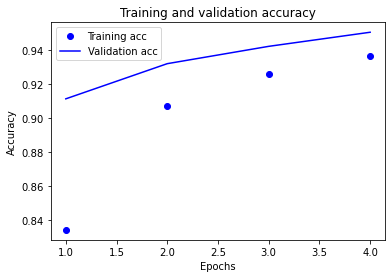

In [20]:
#훈련과 검증 정확도 그리기
plt.clf() # 그래프 초기화하기
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show

In [19]:
#유닛 64개
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history=model.fit(x_train, y_train, epochs=4, batch_size=512, validation_data = (x_val, y_val))
results = model.evaluate(x_test, y_test)

Train on 25000 samples, validate on 10000 samples
Epoch 1/4
25000/25000 [==============================] - 4s 140us/step - loss: 0.4187 - accuracy: 0.8178 - val_loss: 0.2288 - val_accuracy: 0.9244
Epoch 2/4
25000/25000 [==============================] - 3s 137us/step - loss: 0.2366 - accuracy: 0.9097 - val_loss: 0.1588 - val_accuracy: 0.9474
Epoch 3/4
25000/25000 [==============================] - 3s 135us/step - loss: 0.1836 - accuracy: 0.9312 - val_loss: 0.1157 - val_accuracy: 0.9655
Epoch 4/4
25000/25000 [==============================] - 3s 105us/step


In [20]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

<function matplotlib.pyplot.show(close=None, block=None)>

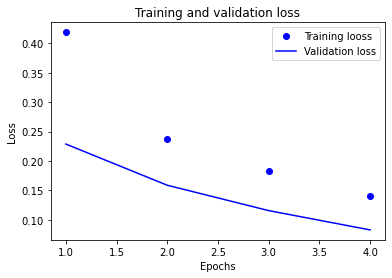

In [21]:
#훈련과 검증손실 그리기
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training looss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

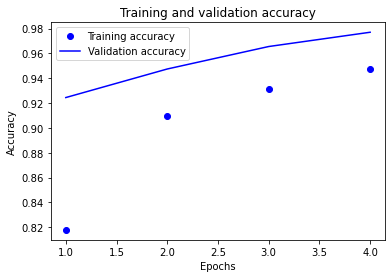

In [23]:
#훈련과 검증 정확도 그리기
plt.clf() # 그래프 초기화하기
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show

In [10]:
# binary_crossentrophy 대신 mse사용
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])

history=model.fit(x_train, y_train, epochs=4, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)

Train on 25000 samples, validate on 10000 samples
Epoch 1/4
25000/25000 [==============================] - 3s 112us/step - loss: 0.1476 - accuracy: 0.8258 - val_loss: 0.0843 - val_accuracy: 0.9153
Epoch 2/4
25000/25000 [==============================] - 3s 102us/step - loss: 0.0780 - accuracy: 0.9108 - val_loss: 0.0571 - val_accuracy: 0.9392
Epoch 3/4
25000/25000 [==============================] - 3s 104us/step - loss: 0.0590 - accuracy: 0.9308 - val_loss: 0.0424 - val_accuracy: 0.9554
Epoch 4/4
25000/25000 [==============================] - 3s 102us/step


In [11]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

<function matplotlib.pyplot.show(close=None, block=None)>

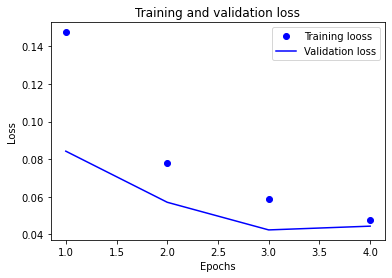

In [12]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training looss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

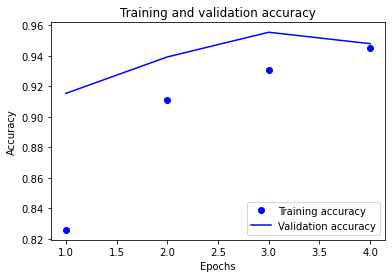

In [13]:
plt.clf() # 그래프 초기화하기
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show

In [12]:
#relu 대신 tanh활성화 함수 써보기
model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history=model.fit(x_train, y_train, epochs=4, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)

Train on 25000 samples, validate on 10000 samples
Epoch 1/4
25000/25000 [==============================] - 3s 137us/step - loss: 0.4304 - accuracy: 0.8297 - val_loss: 0.2615 - val_accuracy: 0.9141
Epoch 2/4
25000/25000 [==============================] - 5s 188us/step - loss: 0.2346 - accuracy: 0.9140 - val_loss: 0.1657 - val_accuracy: 0.9469
Epoch 3/4
25000/25000 [==============================] - 6s 228us/step - loss: 0.1785 - accuracy: 0.9353 - val_loss: 0.1656 - val_accuracy: 0.9371
Epoch 4/4
25000/25000 [==============================] - 5s 193us/step


<function matplotlib.pyplot.show(close=None, block=None)>

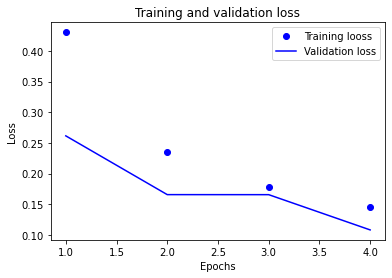

In [13]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training looss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

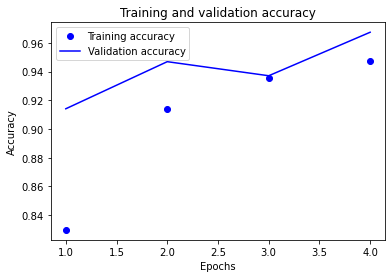

In [14]:
plt.clf() # 그래프 초기화하기
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show